In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h2> Hypothesis which uses the following sigmoid function </h2>
<h1> $$ \frac{1}{(1 + e^{-\theta^\intercal X})} $$ </h1>

In [2]:
def sigmoid(theta, X):
    return 1 / (1 + np.exp((-np.matmul(X,theta.transpose()))))

<h2> Calculates cost with regularization </h2>
<h2> Note that $ \theta_{0} $ is not included in the calculation of cost </h2>
<h1> $$ \frac{1}{m} \sum_{i=1}^m (-y^{(i)}*ln(h_{\theta}(x^{(i)}))-(1-y^{(i)})ln(1-h_{\theta}(x^{(i)}))) + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$ </h1>
<h3> where m = number of training examples, and $y^{(i)}$ and $x^{(i)}$ is training example i </h3>

In [3]:
def calculate_cost(theta, X, y, lbda): # theta is dimensions n x 1, X is dimensions m x n, y is dimensions m x 1, lbda is regularization constant
    m = X.shape[0]
    h = sigmoid(theta, X)
    cost = (1/m)*(-y*np.log(h)-(1-y)*np.log(1-h)).sum() + (lbda / (2*m))*np.square(theta).sum()
    cost -= (lbda / (2*m)) * theta[0]**2 # remove contribution of theta_zero as it should not be included in cost
    return cost

<h2> Vectorized implementation gradient calculation together with regularization </h2>
<h2> Note that for $\theta_{0}$, regularization is not needed </h2>
<h1> $$ \frac{\partial J}{\partial \theta_{j}} = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)} + \frac{\lambda}{m} \theta_{j}$$ </h1>
<h3> for j = 1,2,...,n where n is the number of weights theta, and m is the number of training examples </h3>

In [4]:
def calculate_grad(theta, X, y, lbda):
    m = X.shape[0]
    h = sigmoid(theta, X)
    grad = np.matmul(X.transpose(),h - y) # vectorized implementation of gradient
    grad += (lbda/m) * theta
    grad[0] -= (lbda/m) * theta[0] # remove contribution of theta_zero as it should not be included in grad calculation
    return grad

In [5]:
def logistic_regression(X, y, alpha, iterations, test_X, test_y):
    theta = np.random.rand(X.shape[1]) # randomly initiates weights
    m = X.shape[0]
    costs_train = []
    costs_test = []
    for i in range(iterations):
        costs_train.append(calculate_cost(theta, X, y, 1))
        theta -= alpha * (1/m)*calculate_grad(theta, X ,y, 1)
        costs_test.append(calculate_cost(theta, test_X, test_y, 1))
    x_graph = np.arange(0,iterations,1);    
    plt.plot(x_graph,costs_train, label='train') 
    plt.plot(x_graph,costs_test, label='test')
    plt.legend()
    return theta   

In [6]:
def predict(theta, X, threshold):
    pred = sigmoid(theta, X)
    pred_result = (pred>=threshold).astype(int) # those above threshold = 1, 0 otherwise
    return pred_result

In [7]:
def normalize(X, mean, std):
    return (X-mean) / std

In [8]:
df = pd.read_csv("data/logistic_diabetes.csv")
print(df.isnull().sum())
print(len(df[df['Outcome']==1]))
print(len(df[df['Outcome']==0])) # making sure data is balanced, a bit of imbalance but should be okay
train=df.sample(frac=0.75,random_state=150) #random state is a seed value
test=df.drop(train.index)

train_x = train.loc[:,train.columns != "Outcome"] # splitting dependent and independent variables
test_x = test.loc[:,test.columns != "Outcome"]
train_y = train['Outcome'].values
test_y = test['Outcome'].values

train_mean = train_x.mean(axis=0) # mean normalization
train_std = train_x.std(axis=0)
train_x = normalize(train_x,train_mean ,train_std)
test_x = normalize(test_x,train_mean ,train_std )

train_x.insert(0, 'One', 1) # adding column of ones for theta that is independent of features
test_x.insert(0, 'One', 1)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
268
500


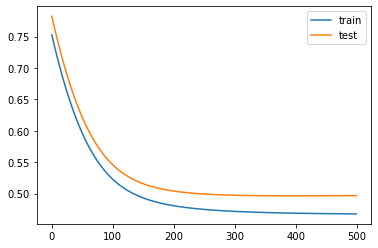

In [9]:
theta = logistic_regression(train_x.values, train_y, 0.05, 500, test_x.values, test_y)

In [1]:
pred_y = predict(theta, test_x.values, 0.6)
result = pred_y == test_y
pred_train_y = predict(theta, train_x.values, 0.6)
result_train = pred_train_y == train_y
print(sum(result) / len(result))

NameError: name 'predict' is not defined